In [ ]:
'''
First attempts to cluster two root systems to use in Suxing's model traits pipeline.
Here my goal is to separate the two root systems used in my root-root interaction studies.
By separating the roots the pipeline can quantify traits of interest separately and with respects
to one another.

Here I am experimenting the use of KMeans, Spectral Clustering, as well as others
--William LaVoy--
'''

In [4]:
#Packages to cluster our models

import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import spectral_clustering

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [13]:
#create paths for our data
data_folder = "./work/"
data_xyz = "ft_all.xyz"
data_ply = "ft_all_aligned.ply"

#for kmeans
x,y,z = np.loadtxt(data_folder+data_xyz,skiprows=1, delimiter=' ', unpack=True)

#DBSCAN
pcd = o3d.io.read_point_cloud(data_folder + data_ply)

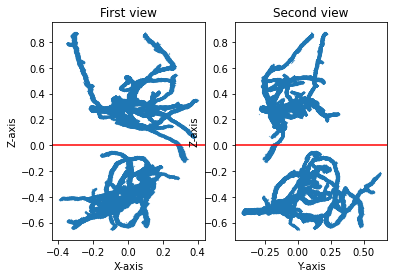

In [4]:
#2d plots to look at view
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(x, z, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title("First view")
plt.xlabel('X-axis')
plt.ylabel('Z-axis')

plt.subplot(1, 2, 2) # index 2
plt.scatter(y, z, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.title("Second view")
plt.xlabel('Y-axis')
plt.ylabel('Z-axis')

plt.show()

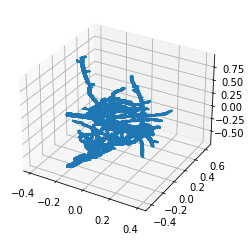

In [3]:
#3D plots
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, s=0.1)
plt.show()

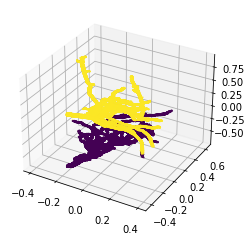

In [5]:
#Kmeans implementation
X=np.column_stack((x, y, z))

kmeans = KMeans(n_clusters=2).fit(X)
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=kmeans.labels_, s=0.1)
plt.show()

#catches a small segment of the other root system

In [14]:
#DBSCAN implementation with open3D

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 2                       ] 2%
Precompute neighbors.[========================================] 100%
point cloud has 2 clusters========================>] 97%


In [12]:
#Spectral Clustering NOT WORKING
X=np.array((x, y, z))

spectral = spectral_clustering(n_clusters=2, eigen_solver="arpack", affinity='nearest_neighbors').fit(X)
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=spectral.labels_, s=0.1)
plt.show()

AttributeError: 'str' object has no attribute 'ndim'

In [8]:
np.array(x,y,z)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given